In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from IPython.display import display

In [82]:
#Key for csv
''' 
---------------------------------
# Code  Description
# ---------------------------------
# e	The value has been edited or estimated by USGS personnel.
# <	The Value is known to be less than reported value.
# >	The value is known to be greater than reported value.
# R	Records for these data have been revised.
# A	Approved for publication -- Processing and review completed.
# P	Provisional data subject to revision.
'''

' \n---------------------------------\n# Code  Description\n# ---------------------------------\n# e\tThe value has been edited or estimated by USGS personnel.\n# <\tThe Value is known to be less than reported value.\n# >\tThe value is known to be greater than reported value.\n# R\tRecords for these data have been revised.\n# A\tApproved for publication -- Processing and review completed.\n# P\tProvisional data subject to revision.\n'

In [83]:
#file_name = 'wallstreet_aug_data'
#file_name = 'Huron R Near New Hudson 2005 - 2014'
file_name = 'Hamburg Rd Gage 2008 - 2015'

In [84]:
#Testing with Average Daily Exceedance Flow Equation
def CCDF_aug_avg_daily_exceedance_flow(file_name):

    df = pd.read_csv(file_name + ".csv")

    df[["Year", "Month", "Day"]] = df["Datetime"].str.split("-", expand=True)

    august_data = df[df["Month"] == '08'].copy()

    sorted_data = august_data.sort_values('Mean_CFS', ascending=False)

    august_data['ranked_column_m'] = sorted_data['Mean_CFS'].rank(method='first', ascending=False)

    df['numbered_col'] = range(1, len(df) + 1)
    
    print("ranked column m:", august_data['ranked_column_m'].head())
    print("mean values: ", august_data['Mean_CFS'].head())
    print("????", august_data['Mean_CFS'].rank(ascending=False))

    n = len(august_data)

    df['P_Value'] = range(1, len(df) + 1)

    P = 0
    august_data['P_Value'] = (august_data['ranked_column_m'] / (n + 1)) * 100
    print(august_data['P_Value'])
    # df = august_data
    # return df
    return(august_data)

In [85]:
CCDF_aug_avg_daily_exceedance_flow(file_name)

ranked column m: 213    139.0
214    142.0
215    149.0
216    166.0
217    174.0
Name: ranked_column_m, dtype: float64
mean values:  213    134.0
214    128.0
215    122.0
216    114.0
217    108.0
Name: Mean_CFS, dtype: float64
???? 213     138.0
214     143.0
215     150.0
216     166.0
217     174.0
        ...  
2795    213.0
2796    216.0
2797    212.0
2798    207.5
2799    205.0
Name: Mean_CFS, Length: 248, dtype: float64
213     55.823293
214     57.028112
215     59.839357
216     66.666667
217     69.879518
          ...    
2795    85.542169
2796    86.746988
2797    85.140562
2798    83.534137
2799    82.730924
Name: P_Value, Length: 248, dtype: float64


,agency_cd,site_no,Datetime,Mean_CFS,71294_00060_00003_cd,Year,Month,Day,ranked_column_m,P_Value
213,USGS,4172000,2008-08-01,134.0,A,2008,08,01,139.0,55.823293
214,USGS,4172000,2008-08-02,128.0,A,2008,08,02,142.0,57.028112
215,USGS,4172000,2008-08-03,122.0,A,2008,08,03,149.0,59.839357
216,USGS,4172000,2008-08-04,114.0,A,2008,08,04,166.0,66.666667
217,USGS,4172000,2008-08-05,108.0,A,2008,08,05,174.0,69.879518
...,...,...,...,...,...,...,...,...,...,...
2795,USGS,4172000,2015-08-27,88.9,A,2015,08,27,213.0,85.542169
2796,USGS,4172000,2015-08-28,87.7,A,2015,08,28,216.0,86.746988
2797,USGS,4172000,2015-08-29,89.0,A,2015,08,29,212.0,85.140562
2798,USGS,4172000,2015-08-30,91.7,A,2015,08,30,208.0,83.534137


In [86]:
#Plotting CCDF
def CCDF_plot(file_name, x, y):

    df = pd.read_csv(file_name + ".csv")

    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(df[x], df[y], marker='o', linestyle='-')
    #plot scatter
    plt.title('CCDF of ' + file_name)
    plt.xlabel('Flow Duration Interval (or) Exceedance Probability (%)') #P value
    plt.ylabel('Mean Daily Flow (cfs)')
    plt.grid(True)

    return plt.show()

In [87]:
#file_name = 'wallstreet_aug_data'
CCDF_aug_avg_daily_exceedance_flow(file_name)
#CCDF_spring_storms(file_name)

Aug_data = CCDF_aug_avg_daily_exceedance_flow(file_name)
#df = CCDF_aug_avg_daily_exceedance_flow(file_name)

#CCDF_plot(Aug_data, 'P_Value', 'Mean_CFS')

ranked column m: 213    139.0
214    142.0
215    149.0
216    166.0
217    174.0
Name: ranked_column_m, dtype: float64
mean values:  213    134.0
214    128.0
215    122.0
216    114.0
217    108.0
Name: Mean_CFS, dtype: float64
???? 213     138.0
214     143.0
215     150.0
216     166.0
217     174.0
        ...  
2795    213.0
2796    216.0
2797    212.0
2798    207.5
2799    205.0
Name: Mean_CFS, Length: 248, dtype: float64
213     55.823293
214     57.028112
215     59.839357
216     66.666667
217     69.879518
          ...    
2795    85.542169
2796    86.746988
2797    85.140562
2798    83.534137
2799    82.730924
Name: P_Value, Length: 248, dtype: float64
ranked column m: 213    139.0
214    142.0
215    149.0
216    166.0
217    174.0
Name: ranked_column_m, dtype: float64
mean values:  213    134.0
214    128.0
215    122.0
216    114.0
217    108.0
Name: Mean_CFS, dtype: float64
???? 213     138.0
214     143.0
215     150.0
216     166.0
217     174.0
        ...  
2795   

In [88]:
#CCDF_plot(Aug_data, 'P_Value', 'Mean_CFS')

In [89]:
def CCDF_plot_P(df, x, y, P):
    df_sorted = df.sort_values(by='P_Value')
    # x = 'P_Value'
    # y = 'Mean_CFS'

    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(df_sorted[x], df_sorted[y], marker='o', linestyle='-')


    # Interpolate the y-value where P_Value = 50
    #p_value = P
    if P in df_sorted[x].values:
        intersection_y = df_sorted[df_sorted[x] == P][y].values[0]
    else:
        intersection_y = np.interp(P, df_sorted[x], df_sorted[y])

    # Plot vertical line at P_Value = 50
    ax.axvline(x=P, color='blue', linestyle='--')

    # Add a horizontal line at the intersection point
    ax.axhline(y=intersection_y, color='green', linestyle='--')

    # Annotate the intersection point
    ax.annotate(f'{intersection_y:.2f}', xy=(P, intersection_y), xytext=(P + 1, intersection_y + 5),
                arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='green')

    # Add scatter plot for individual points
    # ax.scatter(df_sorted[x], df_sorted[y], color='red')
    #plot scatter
    plt.title('CCDF of ' + file_name)
    plt.xlabel('Flow Duration Interval (or) Exceedance Probability (%)') #P value
    plt.ylabel('Mean Daily Flow (cfs)')
    plt.grid(True)

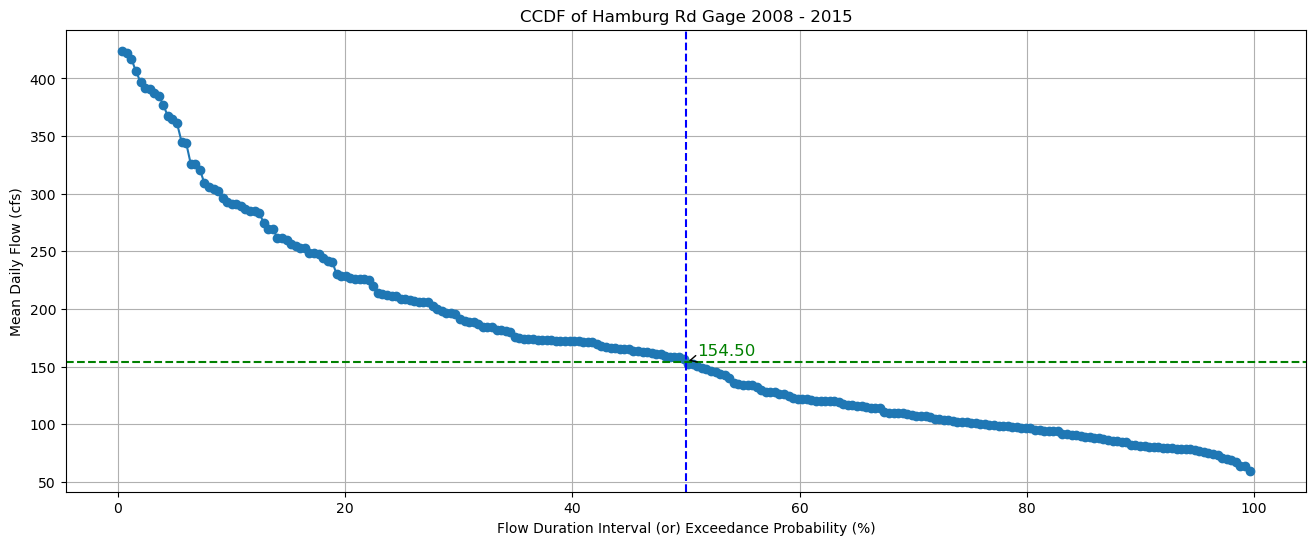

In [90]:
CCDF_plot_P(df = Aug_data, x='P_Value', y='Mean_CFS', P=50)